# 1. Loading Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 2. Loading the Image

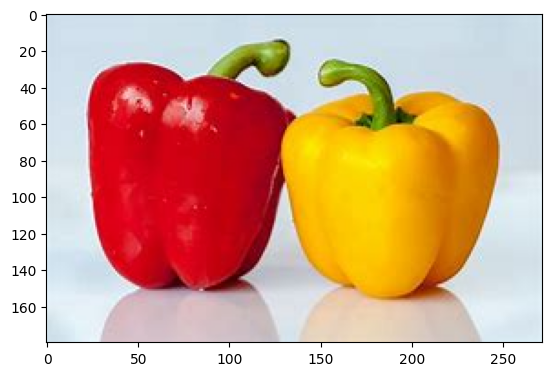

In [2]:
img = Image.open(r"img\capsicum.jpeg")
plt.imshow(img)

# 3. Understanding Image

In [3]:
img.size

(272, 180)

In [4]:
img_arr = np.array(img)
img_arr.shape

(180, 272, 3)

## Regularizing the Image

In [5]:
# Reshaping the image to 2D array of pixels and 3 Color Values i.e. RGB
re_img = img_arr.reshape((-1,3))

In [6]:
re_img

array([[212, 228, 241],
       [210, 226, 239],
       [208, 224, 237],
       ...,
       [221, 238, 246],
       [223, 240, 248],
       [226, 243, 251]], dtype=uint8)

In [7]:
re_img.shape

(48960, 3)

In [8]:
# Converting all pixels values to float32
re_img = np.float32(re_img)

In [9]:
re_img

array([[212., 228., 241.],
       [210., 226., 239.],
       [208., 224., 237.],
       ...,
       [221., 238., 246.],
       [223., 240., 248.],
       [226., 243., 251.]], dtype=float32)

# 4. Performing Clustering

In [10]:
# Importing K-Means Algorithm
from sklearn.cluster import KMeans

In [11]:
# Randomly selecting number of clusters
model = KMeans(n_clusters=30)

In [12]:
# Passing the regularized image
model.fit(re_img)

KMeans(n_clusters=30)

In [13]:
print(model.labels_)

[27  1  1 ... 10 10 10]


In [14]:
print(model.cluster_centers_)

[[111.18025   127.169525   11.811333 ]
 [207.8249    223.75049   234.9119   ]
 [139.3558      9.153641   21.59262  ]
 [251.74628   188.74783     2.3208313]
 [212.45544   161.61385    58.82174  ]
 [232.43791   207.48206   183.62924  ]
 [201.72437   112.43712     2.4751434]
 [215.43039     2.6466522  22.732803 ]
 [229.74245   221.88443   217.91998  ]
 [ 96.00307     7.268875   14.528641 ]
 [228.58984   238.87976   245.63342  ]
 [ 67.665924   69.35653     6.5607147]
 [228.81744   116.72612   116.52698  ]
 [195.31802     1.5350952  15.941505 ]
 [191.56192   169.01651   171.17554  ]
 [221.56947   140.15501     4.2361755]
 [223.25885    70.5374     76.73723  ]
 [252.24014   209.79721     1.7546463]
 [160.6802    181.52457    99.274605 ]
 [207.92282   191.64853   194.81929  ]
 [172.22289     2.292038   21.606613 ]
 [140.21472   160.8205     39.08007  ]
 [204.22002   218.75066   227.5163   ]
 [164.78009    85.1477     15.581306 ]
 [239.79369   164.36366     4.6909943]
 [159.47058    48.896233 

In [15]:
print(model.cluster_centers_.shape)

(30, 3)


In [16]:
# Rebuilding the image with clusters
centers = np.uint8(model.cluster_centers_)
segmented_data = centers[model.labels_.flatten()]

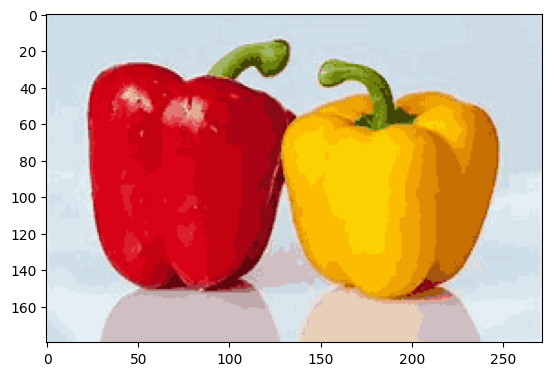

In [17]:
segmented_image = segmented_data.reshape((img_arr.shape))
plt.imshow(segmented_image)

# 5. Identifying Best K Using Elbow Method

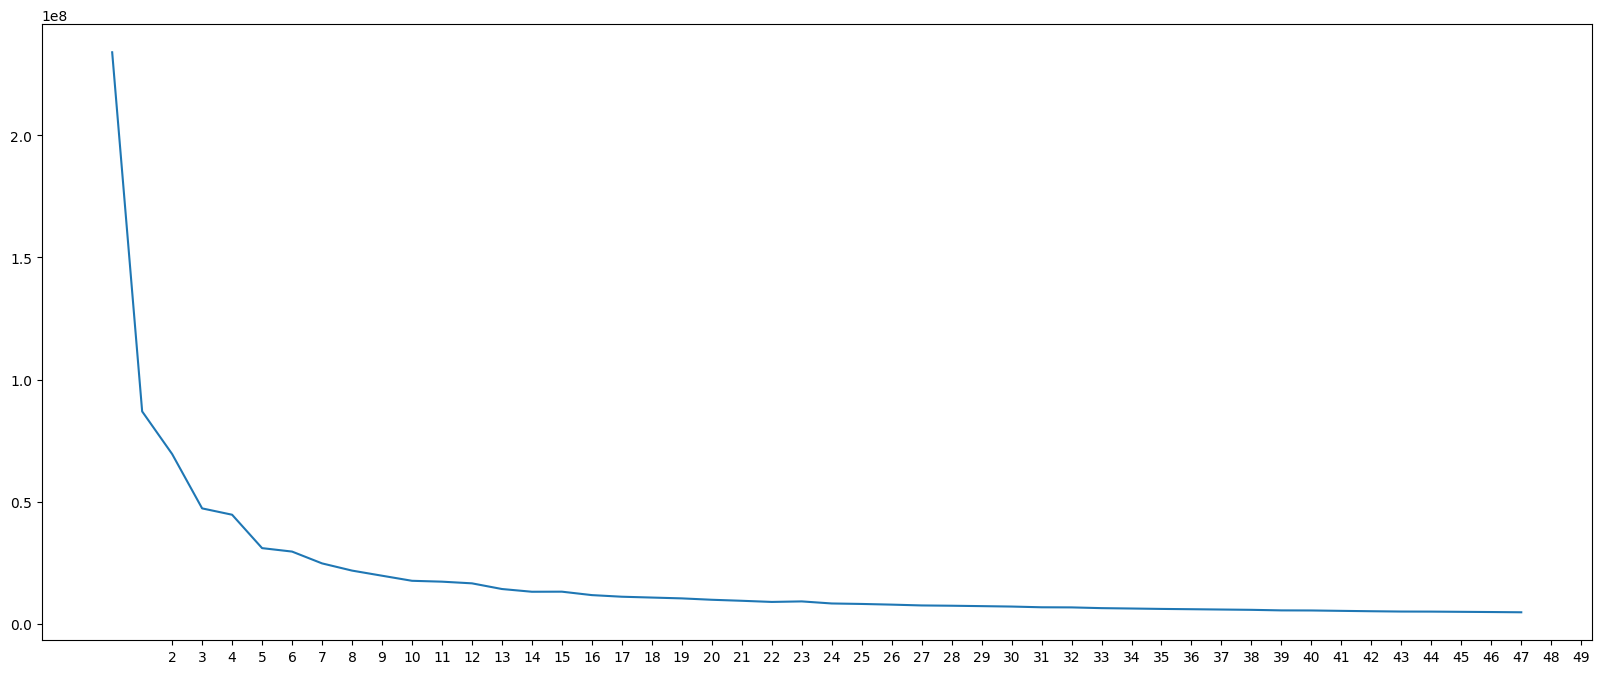

In [18]:
# elbow-curve
ssd = [] # Sum of Squared Distance (Intercluster Distance)
range_n_clusters = [i for i in range(2,50)]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(re_img)
    ssd.append(kmeans.inertia_) # Inertia is the Sum of Squared Distance, i.e. Intercluster Distance
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(20,8))
plt.xticks([i for i in range(2,50)])
plt.plot(ssd)

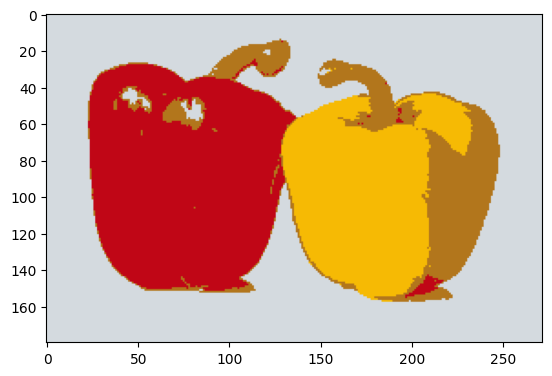

In [19]:
# Based on elbow method doing the clustering with 4 and 10
model = KMeans(n_clusters=4)
model.fit(re_img)
centers = np.uint8(model.cluster_centers_)
segmented_data = centers[model.labels_.flatten()]
segmented_image = segmented_data.reshape((img_arr.shape))
plt.imshow(segmented_image)

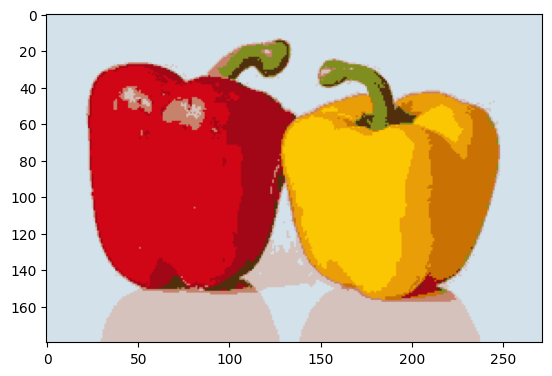

In [20]:
model = KMeans(n_clusters=10)
model.fit(re_img)
centers = np.uint8(model.cluster_centers_)
segmented_data = centers[model.labels_.flatten()]
segmented_image = segmented_data.reshape((img_arr.shape))
plt.imshow(segmented_image)